Protected Lands
===

This notebook merges FieldDoc protected lands with WeConservePA protected lands and plots the distribution of protection type in each cluster and subbasin.

FieldDoc protected lands are lands who's protection has been supported, either directly (OSI programs) or indirectly (Delaware Watershed Operational Fund), by the William Penn Foundation. This data was obtained from FieldDoc on 8/11/2022.

WeConservePA protected lands combines multiple protected lands datasets from across states into a singular dataset for protected lands within the Delware River Basin. The 2022 WeConservePA protected lands data containing protected lands, clusters, land trust associations, and watershed associations within the Delaware River Basin. This data was obtained from Pennsylvania Spatial Data Access (PASDA): https://www.pasda.psu.edu/uci/DataSummary.aspx?dataset=1905

# Setup

In [1]:
# Import packages
from pathlib import Path
from pyproj import CRS
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from shapely.validation import make_valid

In [2]:
# Find your current working directory, which should be folder for this notebook.
Path.cwd()

WindowsPath('C:/Users/clulay/OneDrive - LimnoTech/Documents/GitHub/pollution-assessment/stage2/Protected_Lands')

In [3]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent.parent
project_path

WindowsPath('C:/Users/clulay/OneDrive - LimnoTech/Documents/GitHub/pollution-assessment')

In [4]:
# Path to WeConservePA protected lands shapefile
wcpa_path = project_path / Path('stage2/Protected_Lands/WeConservePA_pl_20220810.shp')
wcpa_path.exists()

True

In [5]:
# Path to FieldDoc protected lands export file
fielddoc_path = project_path / Path('stage2/private/protection_bmps_from_FieldDoc.parquet')
fielddoc_path.exists()

True

# Load data

## Protected Lands From WeConservePA

In [6]:
# Import weconservePA protected lands
wcpa_gdf = gpd.read_file(wcpa_path)

wcpa_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22137 entries, 0 to 22136
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    22137 non-null  int64   
 1   Category    22137 non-null  object  
 2   sitename    21956 non-null  object  
 3   esmthldr    8877 non-null   object  
 4   eholdtype   8868 non-null   object  
 5   own_name    13258 non-null  object  
 6   own_type    18637 non-null  object  
 7   URL         20702 non-null  object  
 8   purpose     18507 non-null  object  
 9   year_est    22137 non-null  int64   
 10  gis_acres   22137 non-null  float64 
 11  pubaccess   22015 non-null  object  
 12  Landscape   911 non-null    object  
 13  Cluster     9355 non-null   object  
 14  LTSA        22115 non-null  object  
 15  WTRSA       18649 non-null  object  
 16  State_abb   22127 non-null  object  
 17  State       22127 non-null  object  
 18  County      22127 non-null  object  
 

In [7]:
# Add data source tag
wcpa_gdf['data_source'] = 'weconservePA_2022'

### Convert Object to Category dtype

In [8]:
wcpa_dtypes = {
    'Category': 'category',
    'sitename': 'category',
    'esmthldr': 'category',
    'eholdtype': 'category',
    'own_name': 'category',
    'own_type': 'category',
    'purpose': 'category',
    'pubaccess': 'category',
    'Landscape': 'category',
    'Cluster': 'category',
    'LTSA': 'category',
    'WTRSA': 'category',
    'State_abb': 'category',
    'State': 'category',
    'County': 'category',
    'Municipali': 'category',
    'Muni_Type': 'category',
    'Muni': 'category',
    'MMW': 'category',
    'RECLASS2': 'category',
    'data_source': 'category'
}

In [9]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

wcpa_gdf = wcpa_gdf.astype(wcpa_dtypes)

In [10]:
wcpa_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22137 entries, 0 to 22136
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     22137 non-null  int64   
 1   Category     22137 non-null  category
 2   sitename     21956 non-null  category
 3   esmthldr     8877 non-null   category
 4   eholdtype    8868 non-null   category
 5   own_name     13258 non-null  category
 6   own_type     18637 non-null  category
 7   URL          20702 non-null  object  
 8   purpose      18507 non-null  category
 9   year_est     22137 non-null  int64   
 10  gis_acres    22137 non-null  float64 
 11  pubaccess    22015 non-null  category
 12  Landscape    911 non-null    category
 13  Cluster      9355 non-null   category
 14  LTSA         22115 non-null  category
 15  WTRSA        18649 non-null  category
 16  State_abb    22127 non-null  category
 17  State        22127 non-null  category
 18  County       22127

In [11]:
wcpa_gdf.RECLASS2.unique()

['Agricultural Easement', 'Conservation Easement', 'Park or Recreation Area - Federal', 'National Resource Area - Federal', 'National Resource Area - Local', 'Park or Recreation Area - Local', 'National Resource Area - Private', 'Park or Recreation Area - Private', 'Park or Recreation Area - State', 'National Resource Area - State']
Categories (10, object): ['Agricultural Easement', 'Conservation Easement', 'National Resource Area - Federal', 'National Resource Area - Local', ..., 'Park or Recreation Area - Federal', 'Park or Recreation Area - Local', 'Park or Recreation Area - Private', 'Park or Recreation Area - State']

In [12]:
# Rename area column
wcpa_gdf.rename(columns={'gis_acres': 'Area_Ac'}, inplace=True)

wcpa_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22137 entries, 0 to 22136
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     22137 non-null  int64   
 1   Category     22137 non-null  category
 2   sitename     21956 non-null  category
 3   esmthldr     8877 non-null   category
 4   eholdtype    8868 non-null   category
 5   own_name     13258 non-null  category
 6   own_type     18637 non-null  category
 7   URL          20702 non-null  object  
 8   purpose      18507 non-null  category
 9   year_est     22137 non-null  int64   
 10  Area_Ac      22137 non-null  float64 
 11  pubaccess    22015 non-null  category
 12  Landscape    911 non-null    category
 13  Cluster      9355 non-null   category
 14  LTSA         22115 non-null  category
 15  WTRSA        18649 non-null  category
 16  State_abb    22127 non-null  category
 17  State        22127 non-null  category
 18  County       22127

<AxesSubplot:>

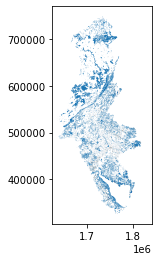

In [13]:
plt.rcParams["figure.figsize"] = (20,20)
wcpa_gdf.plot()

## Protected Lands From FieldDoc

In [14]:
# Import FieldDoc protected lands 
fielddoc_gdf = gpd.read_parquet(fielddoc_path)

# Add a column to fielddoc_gdf with data source
fielddoc_gdf['data_source'] = 'fielddoc_2022-08-11'
fielddoc_gdf.head(n=1)

,practice_name,practice_id,program_name,program_id,organization,description,practice_type,created_at,modified_at,tot_pwr,head_pwr,nat_land,ara_pwr,wet_pwr,dev_land,ag_land,str_bank,geometry,data_source
0,Bartolacci,5301,Delaware River Watershed Protection Fund - For...,5,Natural Lands Trust,Land Protection \n\nShapefile needs to be load...,Conservation easement,2019-01-14T20:29:48.955938Z,2020-12-21T18:28:07.158142Z,26.0,0.0,39.31,25.94,8.59,0.02,0.0,0.43,"POLYGON ((-75.22603 41.12858, -75.22736 41.128...",fielddoc_2022-08-11


In [15]:
fielddoc_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   practice_name  75 non-null     object  
 1   practice_id    75 non-null     int64   
 2   program_name   75 non-null     object  
 3   program_id     75 non-null     int64   
 4   organization   75 non-null     object  
 5   description    26 non-null     object  
 6   practice_type  75 non-null     object  
 7   created_at     75 non-null     object  
 8   modified_at    75 non-null     object  
 9   tot_pwr        75 non-null     float64 
 10  head_pwr       75 non-null     float64 
 11  nat_land       75 non-null     float64 
 12  ara_pwr        75 non-null     float64 
 13  wet_pwr        75 non-null     float64 
 14  dev_land       75 non-null     float64 
 15  ag_land        75 non-null     float64 
 16  str_bank       75 non-null     float64 
 17  geometry       75 non-null   

### Convert Object to Category dtpe

In [16]:
fielddoc_dtypes = {
    'practice_name': 'category',
    'program_name': 'category',
    'organization': 'category',
    'practice_type': 'category',
    'data_source': 'category'}

In [17]:
fielddoc_gdf = fielddoc_gdf.astype(fielddoc_dtypes)

### DRWI Geographies

In [18]:
# Import cluster and focus area geometries
cluster_gdf = gpd.read_parquet(project_path / Path('stage1/data/cluster_df.parquet'))  
focusarea_gdf = gpd.read_parquet(project_path / Path('stage1/data/fa_phase2_df.parquet'))

focusarea_gdf.cluster = focusarea_gdf.cluster.replace('Kirkwood Cohansey Aquifer', 'Kirkwood - Cohansey Aquifer') # update name for consistency with other files 
focusarea_gdf.set_index('name', inplace=True)

In [19]:
cluster_gdf.head()

,gid,objectid,label_id,sum_acres,acres,ncontrb_a,acres_ans,name,shape_leng,shape_area,geom
labels,,,,,,,,,,,
Poconos and Kittatinny,1,0,5,866281.173581,866281.173581,865592.657330,865593,Poconos and Kittatinny,5.179372,0.368441,"MULTIPOLYGON (((511922.413 4619793.062, 511948..."
Middle Schuylkill,2,0,3,501873.916855,501873.916855,501532.547416,501533,Middle Schuylkill,0.000000,0.000000,"MULTIPOLYGON (((398250.125 4483059.000, 398241..."
Brandywine and Christina,3,0,1,360524.071274,360524.071274,360270.075107,360270,Brandywine and Christina,0.000000,0.000000,"MULTIPOLYGON (((448782.249 4434220.000, 448840..."
New Jersey Highlands,4,0,4,441794.273605,441794.273605,441441.637355,441442,New Jersey Highlands,0.000000,0.000000,"MULTIPOLYGON (((486254.217 4533019.500, 486403..."
Schuylkill Highlands,5,0,6,109186.312480,109186.312480,109107.796416,109108,Schuylkill Highlands,0.000000,0.000000,"MULTIPOLYGON (((445764.281 4456450.500, 445828..."


In [20]:
focusarea_gdf.head()

,cluster,strategy,nord,phase,geom,change,tier,subfocusare,area_acres,name_final,geom_buff
name,,,,,,,,,,,
Brandywine Creek Headwaters,Brandywine and Christina,restoration,1165,Phase 2,"MULTIPOLYGON (((424032.708 4440256.746, 424029...",None,None,None,11800.8328,Brandywine Creek Headwaters,01060000206A7F000001000000010300000001000000AE...
Plum Run,Brandywine and Christina,restoration,928,Phase 2,"MULTIPOLYGON (((446401.966 4418305.792, 446394...",None,None,None,2380.8159,Plum Run,01060000206A7F000001000000010300000001000000EE...
Red Clay Creek,Brandywine and Christina,restoration,1469,Phase 2,"MULTIPOLYGON (((441020.876 4413254.885, 440973...",None,None,None,6968.2479,Red Clay Creek,01060000206A7F0000010000000103000000010000003B...
White Clay Creek,Brandywine and Christina,restoration,1351,Phase 2,"MULTIPOLYGON (((430499.059 4416244.890, 430498...",None,None,None,10654.6468,White Clay Creek,01060000206A7F000001000000010300000001000000C2...
Cohansey River,Kirkwood - Cohansey Aquifer,restoration,14605,Phase 2,"MULTIPOLYGON (((478620.866 4369649.016, 478591...",None,None,None,26857.2196,Cohansey River,01060000206A7F0000010000000103000000010000007A...


# Reproject coordinate systems
Reproject all geometries to ESRI 102003 to ensure proper computation of areas.

Must use a coordinate system that correpsonds to an equal area projection (such as ESRI 102003)

Using Albers Equal-Area Conic projection to compute areas: 
- https://epsg.io/5070
- http://www.radicalcartography.net/?projectionref

In [21]:
# Check coordinate systems
wcpa_gdf.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
ea_crs = wcpa_gdf.crs

In [23]:
# Project to equal area crs
wcpa_gdf.to_crs(crs=ea_crs, inplace=True)
focusarea_gdf.to_crs(crs=ea_crs, inplace=True)
cluster_gdf.to_crs(crs=ea_crs, inplace=True)

In [24]:
# Check if fielddoc_gdf has a crs
fielddoc_gdf.crs

In [25]:
# No CRS set for the FieldDoc export 
# Set projection of FieldDoc gdf to match the previous FieldDoc export CRS BEFORE converting to ESRI 102003 
fielddoc_gdf = fielddoc_gdf.set_crs(epsg=4326, inplace=True,allow_override=True)
fielddoc_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
# Convert to ESRI: 102003 which is the USA_Contiguous_Albers_Equal_Area_Conic projection
fielddoc_gdf = fielddoc_gdf.to_crs(crs=ea_crs)
fielddoc_gdf.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [27]:
# Reproject CRS to 3857
#wcpa_gdf.to_crs(epsg=3857, inplace=True)
#fielddoc_gdf.to_crs(epsg=3857, inplace=True)
#focusarea_gdf.to_crs(epsg=3857, inplace=True)
#cluster_gdf.to_crs(epsg=3857, inplace=True)

<AxesSubplot:>

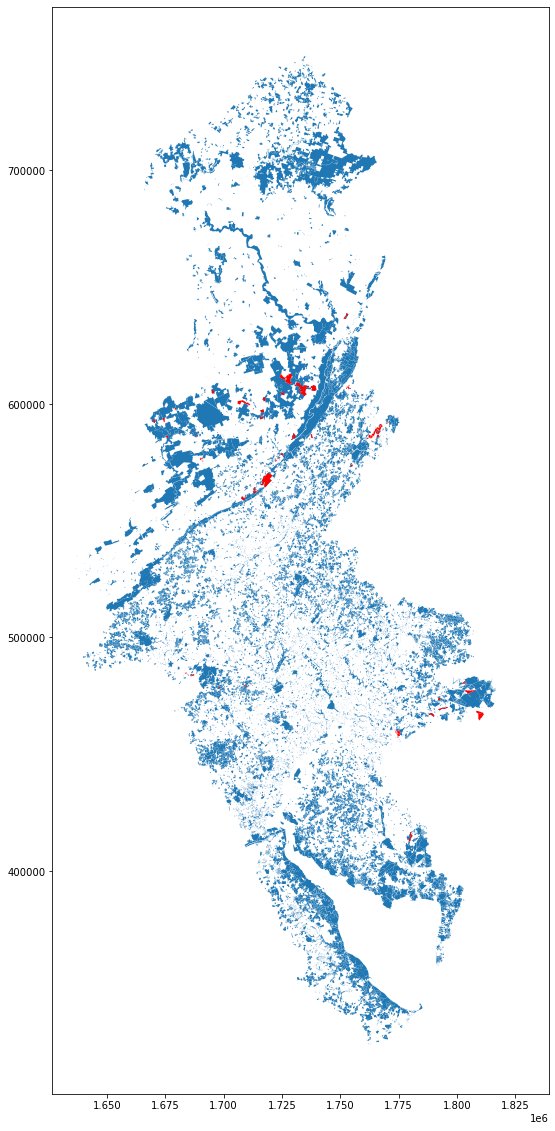

In [28]:
# Plot weconservePA and fielddoc protected lands 
plt.rcParams["figure.figsize"] = (20,20)
fig, ax1 = plt.subplots()
wcpa_gdf.plot(ax=ax1)
cmap = ListedColormap(['red'],name='allred')
fielddoc_gdf.plot(ax=ax1,cmap=cmap)

# Compute FieldDoc BMP Areas

In [29]:
fielddoc_gdf['Area_Ac'] = fielddoc_gdf.geometry.area/4046.86

In [30]:
x=sum(fielddoc_gdf['Area_Ac'])
print('Area (ac): ',x)

Area (ac):  26393.674508310327


In [31]:
list(fielddoc_gdf.program_name.unique())

['Delaware River Watershed Protection Fund - Forestland Capital Grants',
 'Delaware River Watershed Protection Fund - Farm Buffer Capital Grants',
 'Delaware River Watershed Protection Fund - Transaction Grants']

In [32]:
fielddoc_gdf.practice_type.unique()

['Conservation easement', 'Fee acquisition']
Categories (2, object): ['Conservation easement', 'Fee acquisition']

In [33]:
fielddoc_gdf.practice_type.cat.rename_categories(
    {'Conservation easement': 'DRWI Conservation easement', 
     'Fee acquisition': 'DRWI Fee acquisition',
    },
    inplace=True,
)

C:\Users\clulay\AppData\Local\Temp\ipykernel_106008\3402620491.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  fielddoc_gdf.practice_type.cat.rename_categories(


# Merge geodataframes

## Subtract field doc lands from weconservePA to remove any overlap

In [34]:
# Subtract field doc lands from weconservePA lands
dif_gdf = wcpa_gdf.overlay(fielddoc_gdf, how='difference', keep_geom_type=False)

In [35]:
# Check that overlaps were subtracted
orig_area = sum(wcpa_gdf.geometry.area/4046.86)
new_area = sum(dif_gdf.geometry.area/4046.86)
print('Original area (ac): ',orig_area,'\nNew area (ac): ',new_area)

Original area (ac):  2160468.951122692 
New area (ac):  2145727.984720043


<AxesSubplot:>

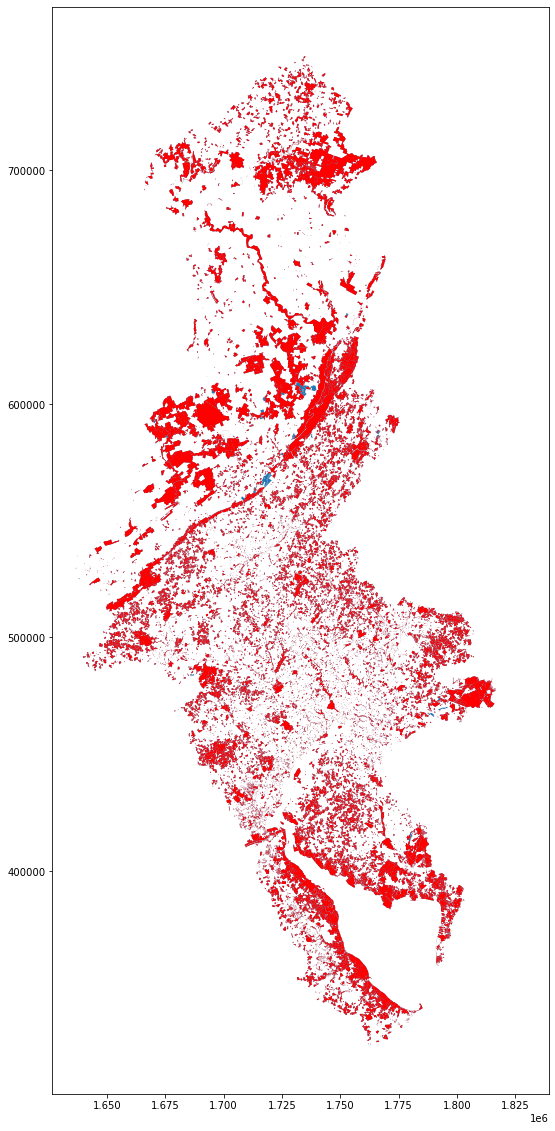

In [36]:
# Plot original weconservePA data against difference gdf
plt.rcParams["figure.figsize"] = (20,20)
fig, ax1 = plt.subplots()
wcpa_gdf.plot(ax=ax1)
cmap = ListedColormap(['red'],name='allred')
dif_gdf.plot(ax=ax1,cmap=cmap)

## Append field doc with weconservePA protected lands

In [37]:
fielddoc_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   practice_name  75 non-null     category
 1   practice_id    75 non-null     int64   
 2   program_name   75 non-null     category
 3   program_id     75 non-null     int64   
 4   organization   75 non-null     category
 5   description    26 non-null     object  
 6   practice_type  75 non-null     category
 7   created_at     75 non-null     object  
 8   modified_at    75 non-null     object  
 9   tot_pwr        75 non-null     float64 
 10  head_pwr       75 non-null     float64 
 11  nat_land       75 non-null     float64 
 12  ara_pwr        75 non-null     float64 
 13  wet_pwr        75 non-null     float64 
 14  dev_land       75 non-null     float64 
 15  ag_land        75 non-null     float64 
 16  str_bank       75 non-null     float64 
 17  geometry       75 non-null   

In [38]:
# Clean up column headers to match in merge
dif_gdf.rename(
    columns={
        'sitename': 'practice_name', 
        'purpose': 'description',
        'esmthldr': 'organization', 
        'RECLASS2': 'practice_type'
    }, 
    inplace=True
)

In [39]:
# Append field doc protected lands with pasda protected lands
all_pl_gdf = fielddoc_gdf.append(dif_gdf)
all_pl_gdf.head(n=1)

C:\Users\clulay\AppData\Local\Temp\ipykernel_106008\799747232.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_pl_gdf = fielddoc_gdf.append(dif_gdf)


,practice_name,practice_id,program_name,program_id,organization,description,practice_type,created_at,modified_at,tot_pwr,...,WTRSA,State_abb,State,County,Municipali,Muni_Type,Muni,MMW,Shape_Leng,Shape_Area
0,Bartolacci,5301.0,Delaware River Watershed Protection Fund - For...,5.0,Natural Lands Trust,Land Protection \n\nShapefile needs to be load...,DRWI Conservation easement,2019-01-14T20:29:48.955938Z,2020-12-21T18:28:07.158142Z,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Compute final areas

## Address invalid geometries

In [40]:
#Identify any invalid geometries
all_pl_gdf_invalid = all_pl_gdf[all_pl_gdf.is_valid == False]
invalid_ind = all_pl_gdf_invalid.index.to_list()
invalid_ind

[51, 65]

In [41]:
# Fix invalid geometries
all_pl_gdf.reset_index(drop=True, inplace=True)
for i in invalid_ind:
    geom = all_pl_gdf.loc[i]['geometry']
    valid = make_valid(geom)
    all_pl_gdf.at[i,'geometry'] = valid

In [42]:
all_pl_gdf['Final_Area_Ac'] = all_pl_gdf.geometry.area/4046.86
all_pl_gdf[['Area_Ac','Final_Area_Ac']]

,Area_Ac,Final_Area_Ac
0,40.062427,40.062427
1,282.593136,282.593136
2,98.425881,98.425881
3,44.854552,44.854552
4,113.608269,113.608269
...,...,...
22207,121.784450,121.784330
22208,1224.569510,1224.568299
22209,618.064921,618.064310
22210,154.353005,154.352852


In [43]:
all_pl_gdf = all_pl_gdf.reset_index()
all_pl_gdf = all_pl_gdf.to_crs(crs=ea_crs)

fd_area = sum(fielddoc_gdf.geometry.area/4046.86)
all_pl_area = sum(all_pl_gdf.geometry.area/4046.86)

print('WCPA original area (ac): ',orig_area,'\nWCPA New area (ac): ',new_area,'\nFieldDoc area (ac): ',fd_area,'\nAll protected land area (ac): ',all_pl_area)

WCPA original area (ac):  2160468.951122692 
WCPA New area (ac):  2145727.984720043 
FieldDoc area (ac):  26393.674508310327 
All protected land area (ac):  2172141.835496285


## Compute Cluster and Focus Areas in correct projection

In [44]:
focusarea_gdf.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [45]:
cluster_gdf['Area_Ac'] = cluster_gdf.geometry.area/4046.86
focusarea_gdf['Area_Ac'] = focusarea_gdf.geometry.area/4046.86

# Plot distribution of protected lands

## By Cluster

In [46]:
cluster_gdf.index

CategoricalIndex(['Poconos and Kittatinny', 'Middle Schuylkill',
                  'Brandywine and Christina', 'New Jersey Highlands',
                  'Schuylkill Highlands', 'Upstream Suburban Philadelphia',
                  'Kirkwood - Cohansey Aquifer', 'Upper Lehigh'],
                 categories=['Brandywine and Christina', 'Kirkwood - Cohansey Aquifer', 'Middle Schuylkill', 'New Jersey Highlands', 'Poconos and Kittatinny', 'Schuylkill Highlands', 'Upper Lehigh', 'Upstream Suburban Philadelphia'], ordered=False, dtype='category', name='labels')

In [47]:
# Ensure all datasets are in equal-area crs
cluster_gdf = cluster_gdf.to_crs(crs=ea_crs)
focusarea_gdf = focusarea_gdf.to_crs(crs=ea_crs)

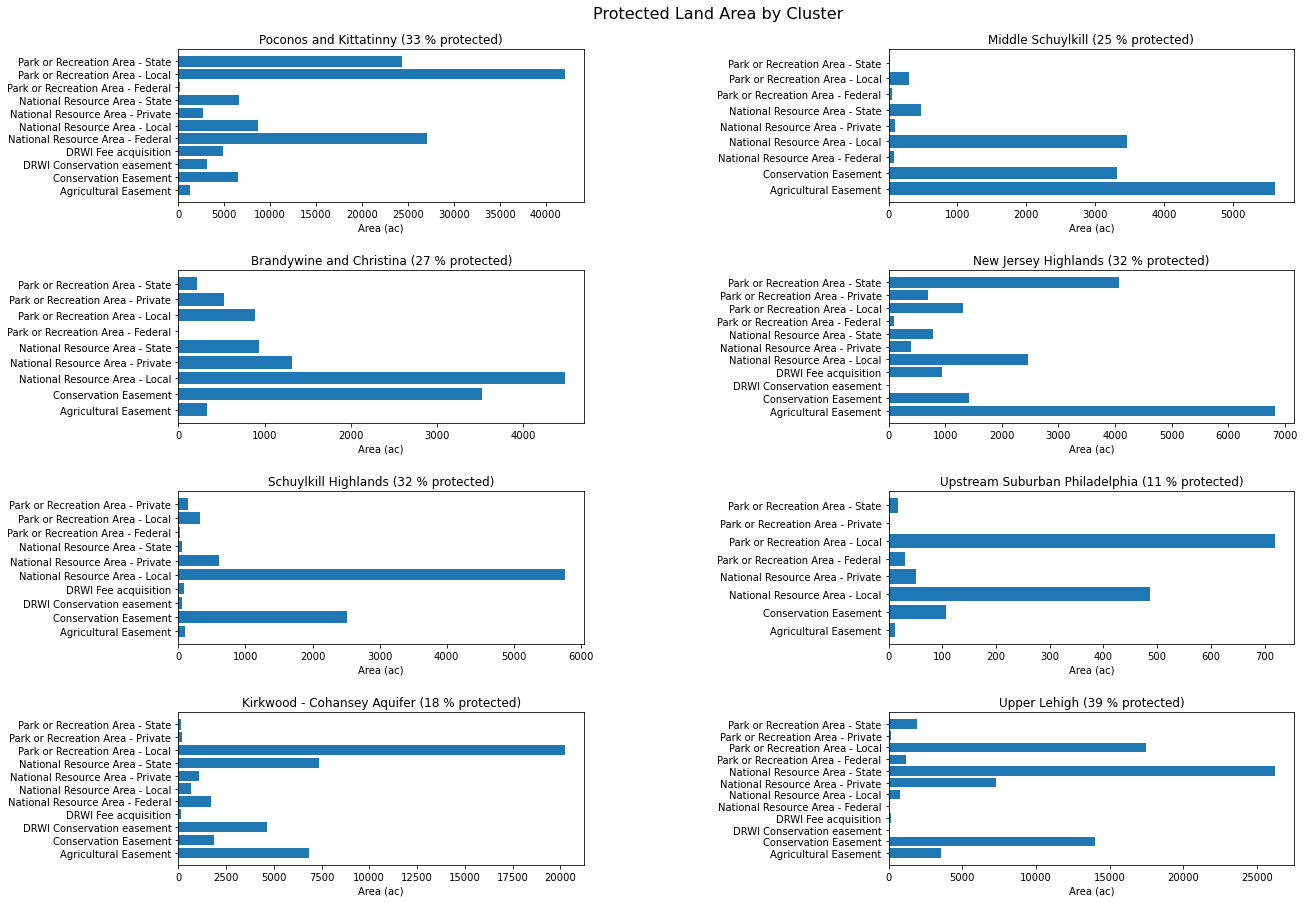

In [48]:
# Plot distribution of protected land area for each cluster
fig, ax = plt.subplots(4,2, figsize=(20,15))
plt.subplots_adjust(hspace=0.45,wspace=0.75)
fig.suptitle('Protected Land Area by Cluster',fontsize=16,y=0.92)
n=0

for cluster in cluster_gdf.index:
    geom = cluster_gdf.loc[[cluster]]
    in_cluster = all_pl_gdf.clip(geom)
    n = n+1
    ax = plt.subplot(4,2,n)
    plt.xlabel('Area (ac)')
    
    # Calculate protected fraction of total area
    cluster_acres = cluster_gdf.at[cluster,'Area_Ac']
    protected_acres = sum(in_cluster.geometry.area/4046.86)
    in_cluster['Area_in_FA'] = in_cluster.geometry.area/4046.86
    protected_percent = 100 * protected_acres / cluster_acres

    plt.title(f'{cluster} ({protected_percent:.0f} % protected)')
    
    plt.barh(in_cluster['practice_type'].sort_values(), width=in_cluster['Area_in_FA'])

In [49]:
in_cluster['practice_type'].sort_values()

3554               Agricultural Easement
3672               Agricultural Easement
3534               Agricultural Easement
3603               Agricultural Easement
3553               Agricultural Easement
                      ...               
20428    Park or Recreation Area - State
20436    Park or Recreation Area - State
20429    Park or Recreation Area - State
20438    Park or Recreation Area - State
20433    Park or Recreation Area - State
Name: practice_type, Length: 377, dtype: object

## By Focus Area

In [50]:
focusarea_gdf.index

Index(['Brandywine Creek Headwaters', 'Plum Run', 'Red Clay Creek',
       'White Clay Creek', 'Cohansey River', 'Lower Salem River', 'Menantico',
       'Muddy Run', 'Rancocas', 'Upper Salem River', 'Furnace Cr',
       'Hosensack Cr', 'Licking Cr', 'Lower Maiden Cr Trib 1',
       'Lower Maiden Cr Trib 3', 'Manatawny Trib 2', 'Manatawny Trib 3',
       'Manor Cr', 'Mill Cr Berger', 'Mill Cr Trib 2', 'Mill Cr Younker',
       'Moselem Cr', 'Tulpehocken Trib 2', 'Tulpehocken Trib 3',
       'Little Manatawny Trib 4', 'Lower Maiden Cr Trib 2',
       'Middle Maiden Trib', 'Northkill', 'Saucony Cr Trib 1',
       'Saucony Cr Trib 2', 'Beaver Brook', 'Lopatcong Creek',
       'Lower Middle Musconetcong', 'Paulinskill', 'Upper Musconetcong',
       'Brodhead', 'Cherry Valley', 'Eastern Mongaup', 'Little Bushkill',
       'Lower Bashakill', 'Lower Neversink', 'Rattlesnake Creek',
       'Upper Neversink', 'Hay Creek', 'Bryn Coed', 'Pigeon Run',
       'Pine Creek - French', 'Pine Creek - Pi

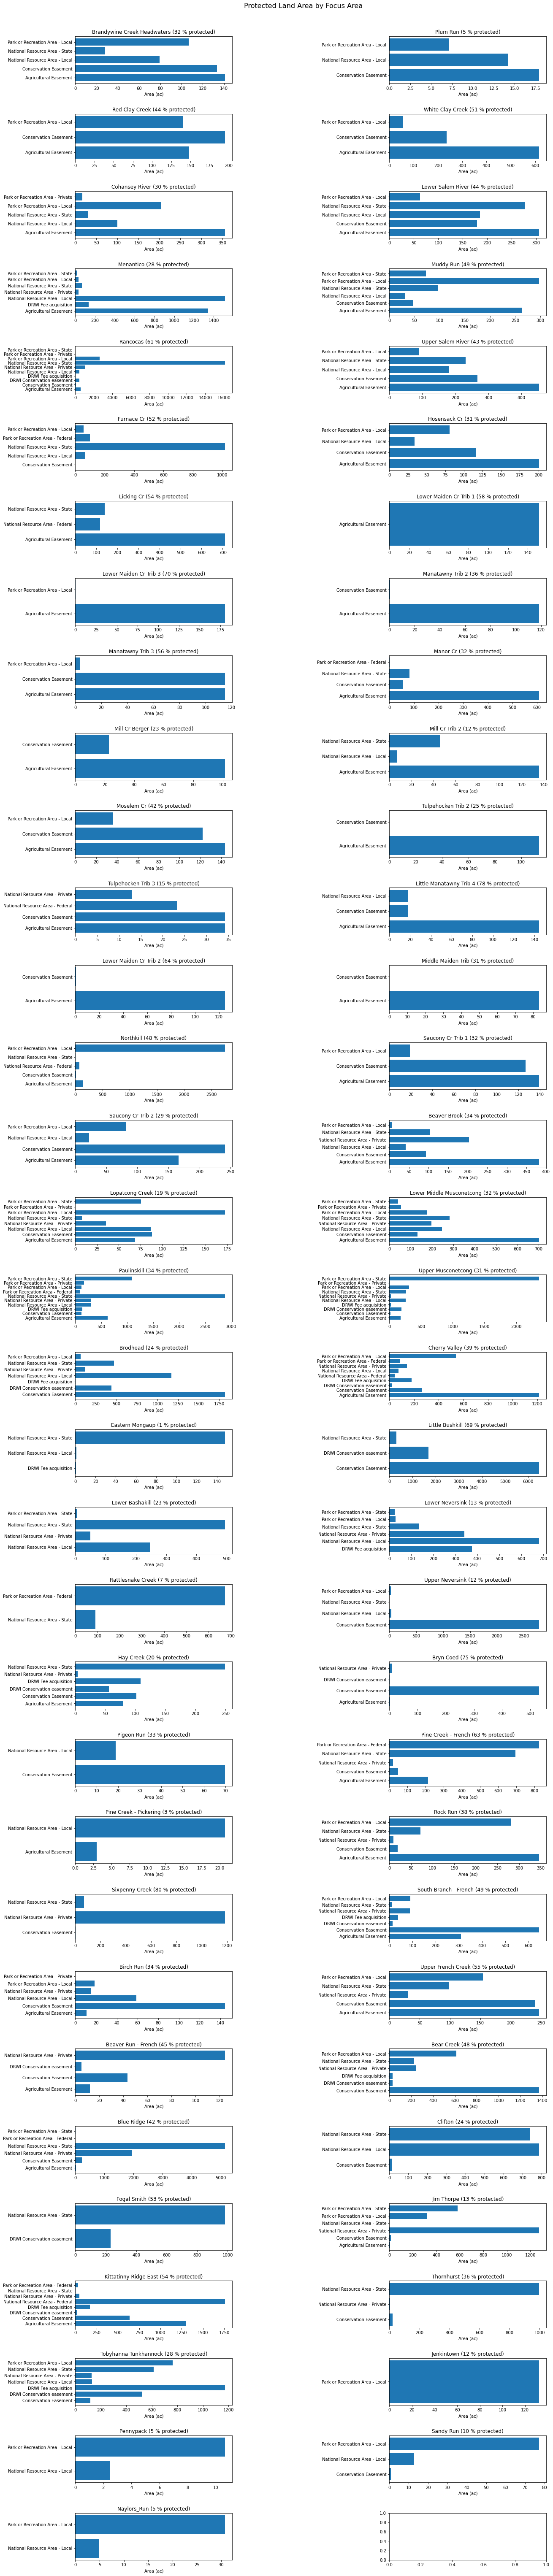

In [51]:
# Plot distribution of protected land area for each focus area
fig, ax = plt.subplots(33,2, figsize=(20,110))
plt.subplots_adjust(hspace=0.65,wspace=1)
fig.suptitle('Protected Land Area by Focus Area',fontsize=16,y=0.89)
n=0

for focusarea in focusarea_gdf.index:
    geom = focusarea_gdf.loc[[focusarea]]
    in_fa = all_pl_gdf.clip(geom)
    
    if in_fa.size != 0:
        n = n+1
        ax = plt.subplot(33,2,n) 
        plt.xlabel('Area (ac)')
        
        # Calculate protected fraction of total area
        fa_acres = focusarea_gdf.at[focusarea,'Area_Ac']
        protected_acres = sum(in_fa.geometry.area/4046.86)
        in_fa['Area_in_FA'] = in_fa.geometry.area/4046.86
        protected_percent = 100 * protected_acres / fa_acres
        
        plt.title(f'{focusarea} ({protected_percent:.0f} % protected)')
        
        plt.barh(in_fa['practice_type'].sort_values(), width=in_fa['Area_in_FA'])